<a href="https://colab.research.google.com/github/sergioaceros/Prediccion_Precio_Casas/blob/main/Predicci%C3%B3n_de_precios_de_casas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Instalamos la Libreria Scikit-Learn**

In [1]:
!pip install scikit-learn

**Cargar el conjunto de datos de California Housing**

El conjunto de datos de California Housing está disponible en la biblioteca scikit-learn, por lo que puedes cargarlo directamente desde allí.

Puedes usar el siguiente código para cargar el conjunto de datos en tu notebook:

In [3]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

# **Exploracion de Datos**

**1. Tipo de datos:** Puedes comenzar imprimiendo el tipo de datos de tu conjunto de datos para comprender qué tipo de objeto estás manipulando. Por ejemplo:

In [5]:
print(type(california.data))

<class 'numpy.ndarray'>


**2. Forma de los datos:** Puedes obtener la forma de tus datos para saber cuántas muestras y características hay en tu conjunto de datos. Por ejemplo:

In [6]:
print(california.data.shape)

(20640, 8)


**3. Nombres de las características:** Si estás trabajando con un conjunto de datos que tiene nombres de características, puedes acceder a ellos directamente desde el objeto de conjunto de datos. Por ejemplo:

In [7]:
print(california.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


**4. Exploración de datos:** Puedes imprimir algunas filas de tus datos para ver cómo están estructurados y qué tipo de valores contienen. Por ejemplo:

In [8]:
print(california.data[:5])  # Imprime las primeras 5 filas de datos

[[ 8.32520000e+00  4.10000000e+01  6.98412698e+00  1.02380952e+00
   3.22000000e+02  2.55555556e+00  3.78800000e+01 -1.22230000e+02]
 [ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]
 [ 7.25740000e+00  5.20000000e+01  8.28813559e+00  1.07344633e+00
   4.96000000e+02  2.80225989e+00  3.78500000e+01 -1.22240000e+02]
 [ 5.64310000e+00  5.20000000e+01  5.81735160e+00  1.07305936e+00
   5.58000000e+02  2.54794521e+00  3.78500000e+01 -1.22250000e+02]
 [ 3.84620000e+00  5.20000000e+01  6.28185328e+00  1.08108108e+00
   5.65000000e+02  2.18146718e+00  3.78500000e+01 -1.22250000e+02]]


In [4]:
# Obtener el número de muestras y características
n_samples, n_features = california.data.shape
print("Número de muestras:", n_samples)
print("Número de características:", n_features)

# Obtener los nombres de las características
feature_names = california.feature_names
print("\nNombres de las características:")
print(feature_names)

Número de muestras: 20640
Número de características: 8

Nombres de las características:
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


# **Construir Modelo de Regresión**

Primero, dividiremos nuestros datos en conjuntos de entrenamiento y prueba. Utilizaremos el conjunto de entrenamiento para entrenar nuestro modelo y el conjunto de prueba para evaluar su rendimiento.

Aquí está el código para dividir los datos:

In [9]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2, random_state=42)

print("Tamaño del conjunto de entrenamiento:", X_train.shape[0])
print("Tamaño del conjunto de prueba:", X_test.shape[0])

Tamaño del conjunto de entrenamiento: 16512
Tamaño del conjunto de prueba: 4128


**1. Importación de la función train_test_split:**

from sklearn.model_selection import train_test_split

Esta línea importa la función train_test_split de scikit-learn, que nos permite dividir nuestros datos en conjuntos de entrenamiento y prueba.

**2. División de los datos:**

X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2, random_state=42)

- **california.data** contiene las características de nuestras muestras, mientras que **california.target** contiene los precios objetivo de las viviendas.
- **test_size=0.2** especifica que queremos que el 20% de los datos se utilicen como conjunto de prueba, y el 80% restante se utilice como conjunto de entrenamiento.
- **random_state=42** asegura que obtengamos la misma división de datos cada vez que ejecutamos el código, lo que hace que nuestros resultados sean reproducibles.

**3. Impresión del tamaño de los conjuntos de entrenamiento y prueba:**

print("Tamaño del conjunto de entrenamiento:", X_train.shape[0])
print("Tamaño del conjunto de prueba:", X_test.shape[0])

Estas líneas imprimen en la consola el tamaño del conjunto de entrenamiento y el tamaño del conjunto de prueba, para verificar que la división se haya realizado correctamente.

En resumen, este código divide nuestros datos en conjuntos de entrenamiento y prueba, lo que nos permite continuar con el preprocesamiento y la construcción de nuestro modelo de regresión.

Vamos a aplicar una transformación de escala a los datos utilizando el objeto **StandardScaler** de scikit-learn. Esto estandarizará cada característica de manera que tenga una media de 0 y una desviación estándar de 1.

Aquí está el código para aplicar la transformación de escala a los datos de entrenamiento y prueba:

In [10]:
from sklearn.preprocessing import StandardScaler

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Aplicar la transformación de escala a los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Aplicar la misma transformación de escala a los datos de prueba
X_test_scaled = scaler.transform(X_test)

Ahora que hemos aplicado la transformación de escala a nuestros datos, estamos listos para construir y entrenar nuestro modelo de regresión.

Utilizaremos un modelo de regresión lineal para este proyecto, ya que es un modelo simple pero efectivo para problemas de regresión. Vamos a construir y entrenar el modelo utilizando los datos de entrenamiento escalados.

Aquí está el código para construir y entrenar el modelo de regresión lineal:

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento escalados
model.fit(X_train_scaled, y_train)

# Predecir los precios de las viviendas en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Calcular el error cuadrático medio (MSE) en el conjunto de prueba
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio en el conjunto de prueba:", mse)


Error cuadrático medio en el conjunto de prueba: 0.5558915986952442


**Explicación del código paso a paso:**

**1. Importación de clases necesarias:**

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

Importamos las clases LinearRegression y mean_squared_error de scikit-learn. LinearRegression se utilizará para construir el modelo de regresión lineal, mientras que mean_squared_error se utilizará para calcular el error cuadrático medio.

**2. Creación del modelo de regresión lineal:**

model = LinearRegression()

Creamos una instancia del modelo de regresión lineal utilizando la clase LinearRegression.

**3. Entrenamiento del modelo:**

model.fit(X_train_scaled, y_train)

Entrenamos el modelo utilizando los datos de entrenamiento escalados (X_train_scaled) y los valores objetivo correspondientes (y_train). El modelo aprenderá a predecir los precios de las viviendas basándose en las características de entrada.

**4. Predicción sobre el conjunto de prueba:**

y_pred = model.predict(X_test_scaled)

Utilizamos el modelo entrenado para hacer predicciones sobre los datos de prueba escalados (X_test_scaled). Esto nos dará las predicciones de precios de las viviendas para el conjunto de prueba.

**5. Cálculo del error cuadrático medio (MSE):**

mse = mean_squared_error(y_test, y_pred)

print("Error cuadrático medio en el conjunto de prueba:", mse)

Calculamos el error cuadrático medio (MSE) entre las etiquetas reales de los precios de las viviendas en el conjunto de prueba (y_test) y las predicciones hechas por nuestro modelo (y_pred). El MSE es una medida comúnmente utilizada para evaluar el rendimiento de un modelo de regresión, donde valores más bajos indican un mejor ajuste del modelo a los datos.

# **Exploracion de Rendimiento del Modelo**

**Ahora que hemos construido y evaluado nuestro modelo de regresión lineal, podríamos querer explorar más a fondo su rendimiento y entender cómo se comparan las predicciones con los valores reales de los precios de las viviendas.**

**Una forma común de hacer esto es visualizar las predicciones frente a los valores reales en un diagrama de dispersión. Esto nos dará una idea visual de qué tan bien se ajustan las predicciones del modelo a los valores reales.**

Visualizar las predicciones del modelo frente a los valores reales de los precios de las viviendas en el conjunto de prueba.

Para hacer esto, utilizaremos un diagrama de dispersión donde el eje x representará los valores reales y el eje y representará las predicciones del modelo.

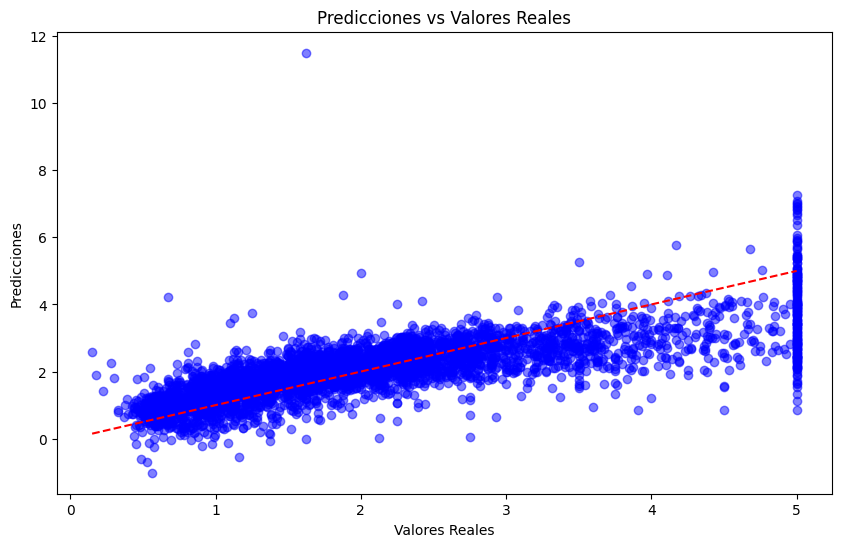

In [12]:
import matplotlib.pyplot as plt

# Graficar las predicciones vs los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()


# **RESUMEN**

El modelo de regresión lineal que construimos en este proyecto puede aportarte varios insights y utilidades:

**Predicciones de precios de viviendas:** El modelo puede predecir los precios de las viviendas en función de las características proporcionadas. Esto puede ser útil para estimar el valor de una propiedad antes de comprarla o venderla, o para establecer precios de alquiler.

**Identificación de características importantes:** Al analizar los coeficientes del modelo, puedes identificar qué características tienen el mayor impacto en el precio de una vivienda. Esto puede proporcionarte información valiosa sobre qué aspectos son más relevantes al determinar el valor de una propiedad.

**Comparación de precios:** Puedes utilizar el modelo para comparar los precios predichos con los precios reales de las viviendas en el conjunto de prueba. Esto te permite evaluar la precisión del modelo y determinar en qué casos se desempeña mejor o peor.

**Optimización de características:** Si dispones de datos adicionales sobre las viviendas que no se utilizaron en este proyecto, puedes incorporar esas características al modelo para mejorar su rendimiento. Esto te permite ajustar y optimizar el modelo para adaptarlo mejor a tus necesidades específicas.